# Healthcare Dataset Analysis
This notebook performs preprocessing, analysis, and visualization tasks.

Source: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

## Load Dataset

Loading the dataset

In [179]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

# Display basic information about the dataset
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


## Preprocessing

Python code to implement a data-cleaning pipeline with five cleaning functions.

### Helper function for changed rows
Helper to show changed rows.

In [180]:
def show_changed_rows(df_before, df_after, description, question_type):
    if question_type == True:
        """Print FIRST 10 rows that differ between df_before and df_after."""
        diff_mask = (df_before != df_after) & ~(df_before.isna() & df_after.isna())
        changed_idx = diff_mask.any(axis=1)
        changed_rows = df_after.loc[changed_idx]

        print(f"\n=== Rows changed by: {description} (showing FIRST 10 changed rows) ===")
        if changed_rows.empty:
            print("No rows were changed in the main dataset.")
        else:
            display(changed_rows.head(10))

        return changed_rows
    
    else:
        """Print ALL rows that differ between df_before and df_after."""
        diff_mask = (df_before != df_after) & ~(df_before.isna() & df_after.isna())
        changed_idx = diff_mask.any(axis=1)
        changed_rows = df_after.loc[changed_idx]

        print(f"\n=== Rows changed by: {description} (showing ALL changed rows) ===")
        if changed_rows.empty:
            print("No rows were changed in the main dataset.")
        else:
            display(changed_rows)
        return changed_rows

### Handle missing values

In [181]:
df_before_missing = df.copy()

def handle_missing_values(df_input):
    # Work on a copy to avoid modifying in place accidentally
    df_local = df_input.copy()
    
    # Determine numeric and categorical columns for THIS dataframe
    numeric_cols = df_local.select_dtypes(include=[np.number]).columns
    categorical_cols = df_local.select_dtypes(exclude=[np.number]).columns
    
    # Fill numeric with median
    for col in numeric_cols:
        if df_local[col].isna().any():
            median_val = df_local[col].median()
            df_local[col] = df_local[col].fillna(median_val)
    
    # Fill categorical with mode
    for col in categorical_cols:
        if df_local[col].isna().any():
            mode_val = df_local[col].mode()
            if not mode_val.empty:
                df_local[col] = df_local[col].fillna(mode_val[0])
    
    return df_local

# Apply to main dataset
df = handle_missing_values(df)
changed_rows_missing = show_changed_rows(df_before_missing, df, "Handle missing values", False)

# If no changes, demonstrate on a small example
if changed_rows_missing.empty:
    print("\nNo missing values in main dataset; demonstrating on a made-up example:")
    example = pd.DataFrame({
        "Age": [25, np.nan, 40, 35, np.nan],
        "Gender": ["Male", "Female", None, "Female", "Male"]
    })
    print("Example BEFORE:")
    display(example)
    
    example_clean = handle_missing_values(example)
    print("Example AFTER:")
    display(example_clean)


=== Rows changed by: Handle missing values (showing ALL changed rows) ===
No rows were changed in the main dataset.

No missing values in main dataset; demonstrating on a made-up example:
Example BEFORE:


,Age,Gender
0,25.0,Male
1,NaN,Female
2,40.0,None
3,35.0,Female
4,NaN,Male


Example AFTER:


,Age,Gender
0,25.0,Male
1,35.0,Female
2,40.0,Female
3,35.0,Female
4,35.0,Male


### Remove duplicates from the dataset

In [182]:
df_before_dups = df.copy()

def remove_duplicates_and_get_removed(df_input):
    df_local = df_input.copy()
    
    # True for rows that are duplicates of a previous row
    dup_mask = df_local.duplicated()
    
    removed_rows = df_local[dup_mask].copy()
    
    before = len(df_local)
    df_clean = df_local.drop_duplicates()
    after = len(df_clean)
    
    print(f"Removed {before - after} duplicate rows.")
    return df_clean, removed_rows

df, removed_dup_rows = remove_duplicates_and_get_removed(df_before_dups)

print("\nRows removed as duplicates:")
if removed_dup_rows.empty:
    print("\nNo duplicates in main dataset; demonstrating on a made-up example:")
    example_dup = pd.DataFrame({
        "Patient_ID": [1, 2, 2, 3, 3],
        "Age": [30, 40, 40, 50, 50]
    })
    print("Example BEFORE:")
    display(example_dup)
    example_clean = remove_duplicates_and_get_removed(example_dup)
    print("Example AFTER:")
    display(example_clean)
    print("No duplicate rows were found in the main dataset.")
else:
    display(removed_dup_rows)

Removed 534 duplicate rows.

Rows removed as duplicates:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


### Handle values that are invalid for the expected type and range.
Handle invalid ages and billing amounts. 0 > Age or Age > 120 and Billing Amounts < 0

In [ ]:
df_before_invalid = df.copy()

def handle_invalid_values(df):
    df = df.copy()
    
    # Age: should be between 0 and 120
    invalid_age_mask = (df["Age"] < 0) | (df["Age"] > 120)
    df.loc[invalid_age_mask, "Age"] = np.nan
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Age"] = np.floor(df["Age"]).astype(int)
    
    # Billing_Amount: should be >= 0
    invalid_bill_mask = df["Billing Amount"] < 0
    df.loc[invalid_bill_mask, "Billing Amount"] = np.nan
    df["Billing Amount"] = df["Billing Amount"].fillna(df["Billing Amount"].median())
    
    return df

df = handle_invalid_values(df)
changed_rows_invalid = show_changed_rows(df_before_invalid, df, "Handle invalid ranges", False)

num_modified = len(changed_rows_invalid)
print(f"\nRows modified due to invalid values: {num_modified}")

if changed_rows_invalid.empty:
    print("\nNo invalid values in main dataset; demonstrating on made-up example:")
    example_inv = pd.DataFrame({
        "Age": [25, -5, 200, 40, -130],
        "Billing Amount": [1000, -50, 500, -10, 300]
    })
    print("Example BEFORE:")
    display(example_inv)
    example_clean = handle_invalid_values(example_inv)
    print("Example AFTER:")
    display(example_clean)


=== Rows changed by: Handle invalid ranges (showing ALL changed rows) ===


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,25593.873,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,25593.873,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,25593.873,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,25593.873,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,25593.873,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52213,mr. ChRIStOPhER aLvARaDO,74,Male,AB+,Obesity,2022-06-03,Mr. Dean Guzman DDS,Johnson Inc,Blue Cross,25593.873,257,Elective,2022-06-13,Paracetamol,Inconclusive
52629,gABrieLlE deCkER,66,Male,AB-,Arthritis,2022-11-07,William Krause,Diaz-Bishop,Cigna,25593.873,354,Urgent,2022-11-30,Penicillin,Normal
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,25593.873,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,25593.873,426,Elective,2020-04-26,Lipitor,Abnormal



Rows modified due to invalid values: 106


### Uniform case standardization for text (decide and apply lower/upper consistently; trim whitespace).
Standarizing the name column. Lowercase + strip

In [ ]:
df_before_name = df.copy()

def standardize_name_column(df_input):
    df_local = df_input.copy()
    
    if "Name" in df_local.columns:
        # lowercase + strip whitespace
        df_local["Name"] = (
            df_local["Name"]
            .astype(str)
            .str.strip()
            .str.lower()
        )
    else:
        print("Column 'Name' not found.")
    
    return df_local

# Apply cleaning
df = standardize_name_column(df)

# Show changed rows using the helper function
changed_rows_name = show_changed_rows(df_before_name, df, "Standardize Name column (lowercase)", True)

if changed_rows_name.empty:
    print("\nNo invalid values in main dataset; demonstrating on made-up example:")
    example_inv = pd.DataFrame({
        "Name": ["bobby jackson", "LeSLie TerrY", "DANNY SMITH", "Andrew Watts", "sara connor"]
    })
    print("Example BEFORE:")
    display(example_inv)
    example_clean = standardize_name_column(example_inv)
    print("Example AFTER:")
    display(example_clean)


=== Rows changed by: Standardize Name column (lowercase) (showing FIRST 10 changed rows) ===


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,emily johnson,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edward edwards,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,christina martinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,jasmine aguilar,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,christopher berg,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


### Normalize mixed-format dates to a single standard : YYYY-MM-DD.

In [ ]:
df_before_dates = df.copy()

def normalize_date_columns(df_input, date_cols):
    df_local = df_input.copy()

    for col in date_cols:
        if col in df_local.columns:
            # Parse using pandas; do element-wise parsing so mixed formats are handled and each value is passed through dateutil.
            parsed = df_local[col].apply(lambda x: pd.to_datetime(x, errors='coerce'))

            # Format parsed datetimes to ISO YYYY-MM-DD.
            # Keep missing values as <NA> so downstream comparisons behave correctly.
            formatted = parsed.dt.strftime('%Y-%m-%d')
            formatted = formatted.where(parsed.notna(), pd.NA)
            df_local[col] = formatted
        else:
            print(f"Column '{col}' not found in dataset.")

    return df_local

# List of date columns that we want to normalize
date_columns = ["Date of Admission", "Discharge Date"]

# Apply cleaning
df = normalize_date_columns(df, date_columns)

# Using the helper function to show changed rows
changed_rows_dates = show_changed_rows(df_before_dates, df, "Normalize date columns to YYYY-MM-DD", True)


if changed_rows_dates.empty:
    print("\nNo invalid values in main dataset; demonstrating on made-up example:")
    example_inv = pd.DataFrame({
        "Date of Admission": ["06-19-2025", "2025-11-17", "10.23.2005", "12/31/1999", "04-15-2020"],
        "Discharge Date": ["2025/07/01", "11-25-2025", "2005.11.01", "01/15/2000", "2020/12/01"]
    })
    print("Example BEFORE:")
    display(example_inv)
    example_clean = normalize_date_columns(example_inv, date_columns)
    print("Example AFTER:")
    display(example_clean)



=== Rows changed by: Normalize date columns to YYYY-MM-DD (showing FIRST 10 changed rows) ===
No rows were changed in the main dataset.

No invalid values in main dataset; demonstrating on made-up example:
Example BEFORE:


,Date of Admission,Discharge Date
0,06-19-2025,2025/07/01
1,2025-11-17,11-25-2025
2,10.23.2005,2005.11.01
3,12/31/1999,01/15/2000
4,04-15-2020,2020/12/01


Example AFTER:


,Date of Admission,Discharge Date
0,2025-06-19,2025-07-01
1,2025-11-17,2025-11-25
2,2005-10-23,2005-11-01
3,1999-12-31,2000-01-15
4,2020-04-15,2020-12-01


### Markdown explanation

A. Out of the five issues present, the ones we encountered were duplicates, handle values that are invalid for the expected type and range, and uniform case standarization for text (decide and apply lower/upper consistently; trim whitespace). [NEEED TO ADD MORE]

B. The issues that were not present were ndle missing values and normalize mixed-format dates to a single standard: YYYY-MM-DD

## Analysis

### Analysis #1 - Top 3 medical conditions by insurance provider (by total billing)

In [186]:
N = 3

topN = (df.groupby(["Insurance Provider", "Medical Condition"], as_index=False)["Billing Amount"].sum())

topN["rank"] = topN.groupby("Insurance Provider")["Billing Amount"].rank(method="first", ascending=False)

topN_filtered = topN[topN["rank"] <= N].sort_values(["Insurance Provider", "rank"])

topN_filtered

,Insurance Provider,Medical Condition,Billing Amount,rank
4,Aetna,Hypertension,4.835876e+07,1.0
3,Aetna,Diabetes,4.686016e+07,2.0
0,Aetna,Arthritis,4.631478e+07,3.0
11,Blue Cross,Obesity,4.892754e+07,1.0
9,Blue Cross,Diabetes,4.775341e+07,2.0
6,Blue Cross,Arthritis,4.731658e+07,3.0
13,Cigna,Asthma,4.853297e+07,1.0
17,Cigna,Obesity,4.836757e+07,2.0
15,Cigna,Diabetes,4.827248e+07,3.0
21,Medicare,Diabetes,4.856904e+07,1.0


### Analysis #2 - Billing amount across age bins.

In [187]:
bins = [0, 30, 60, 120]
labels = ["0-29", "30-59", "60+"]

df["Age bin"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_bin_summary = (df.groupby("Age bin", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg_Billing Amount"}))

age_bin_summary

/var/folders/lh/l7nnk61j04q09qkp4qp7cg040000gn/T/ipykernel_52073/3608981093.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_summary = (df.groupby("Age bin", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg_Billing Amount"}))


,Age bin,Avg_Billing Amount
0,0-29,25621.278231
1,30-59,25610.705579
2,60+,25563.682411


### Analysis #3 - Average billing for Emergency admissions by medical condition

In [188]:
emergency = df[df["Admission Type"] == "Emergency"]

emergency_summary = (emergency.groupby("Medical Condition", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg Billing Emergency"}))

emergency_summary.sort_values("Avg Billing Emergency", ascending=False).head(10)

,Medical Condition,Avg Billing Emergency
1,Asthma,25937.190665
5,Obesity,25887.385422
3,Diabetes,25524.190044
0,Arthritis,25522.398544
4,Hypertension,25514.951270
2,Cancer,24910.492577


### Analysis #4 - Percentage of total billing by insurance provider

In [189]:
total_billing = df["Billing Amount"].sum()

ins_pct = (df.groupby("Insurance Provider", as_index=False)["Billing Amount"].sum())

ins_pct["Percent of total"] = 100 * ins_pct["Billing Amount"] / total_billing

ins_pct.sort_values("Percent of total", ascending=False)

,Insurance Provider,Billing Amount,Percent of total
2,Cigna,2.849607e+08,20.255453
3,Medicare,2.834586e+08,20.148684
1,Blue Cross,2.808006e+08,19.959746
4,UnitedHealthcare,2.804068e+08,19.931755
0,Aetna,2.772078e+08,19.704362


### Analysis #5 - Average billing amount over time (by month)

In [190]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Admission Year-Month"] = df["Date of Admission"].dt.to_period("M").astype(str)

monthly_avg = (df.groupby("Admission Year-Month", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg Billing Amount"}))

monthly_avg.sort_values("Admission Year-Month")

,Admission Year-Month,Avg Billing Amount
0,2019-05,25897.815731
1,2019-06,26324.114335
2,2019-07,25928.654492
3,2019-08,25457.253189
4,2019-09,24915.548929
...,...,...
56,2024-01,25836.695757
57,2024-02,25703.816580
58,2024-03,25310.693307
59,2024-04,24930.138563


## Visualization

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

### Figure #1 - Histogram of billing amounts

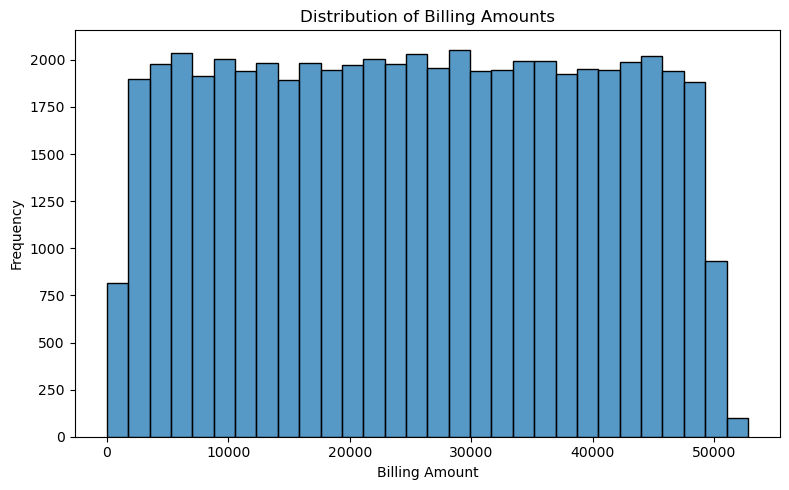

In [192]:
plt.figure(figsize=(8,5))
sns.histplot(df["Billing Amount"], bins=30)
plt.title("Distribution of Billing Amounts")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The histogram shows that the billing amounts are spread fairly evenly across the entire range, indicating an approximately uniform distribution.

### Figure #2 - Billing amount by admission type (Box Plot)

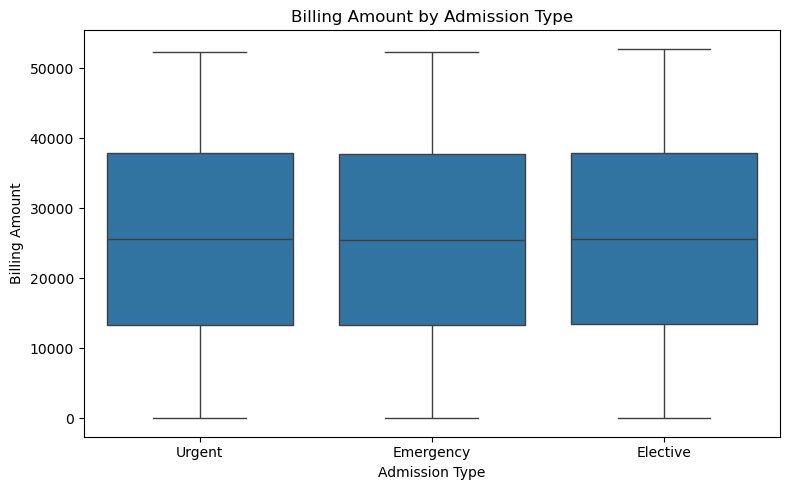

In [193]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Admission Type", y="Billing Amount")
plt.title("Billing Amount by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()

Urgent, emergency, and elective admissions all have similar billing distributions. Indicating that admission type does not change billing cost patterns.

### Figure #3 - Monthly Average Billing Amount Over Time (Line Chart)

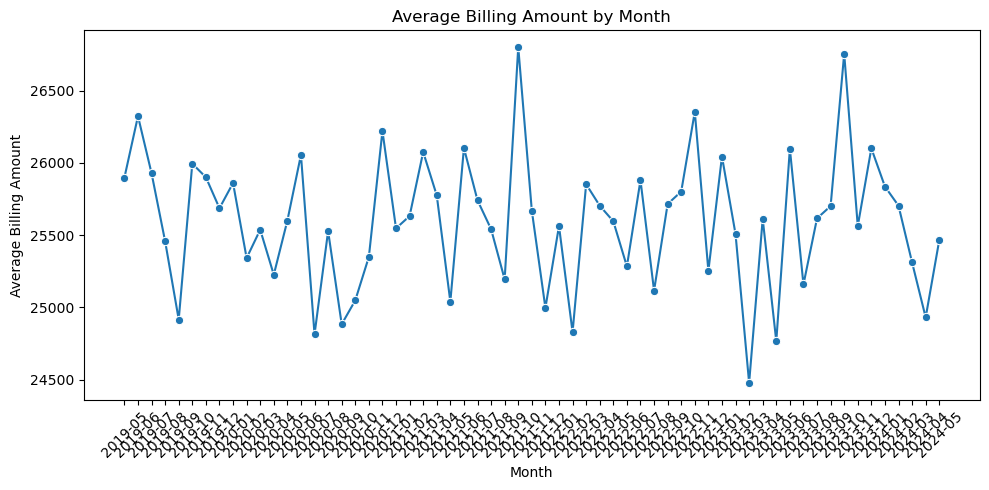

In [194]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])

monthly_avg = (
    df.groupby(df["Date of Admission"].dt.to_period("M"))["Billing Amount"]
      .mean()
      .reset_index()
      .rename(columns={"Date of Admission": "Month", "Billing Amount": "Avg Billing"})
)

monthly_avg["Month"] = monthly_avg["Month"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_avg, x="Month", y="Avg Billing", marker="o")
plt.title("Average Billing Amount by Month")
plt.xlabel("Month")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Monthly average billing amounts fluctuate over time but remain within a narrow range.

### Figure #4 - Scatter Plot of Age vs Billing Amount (Made from a 5% random sample)

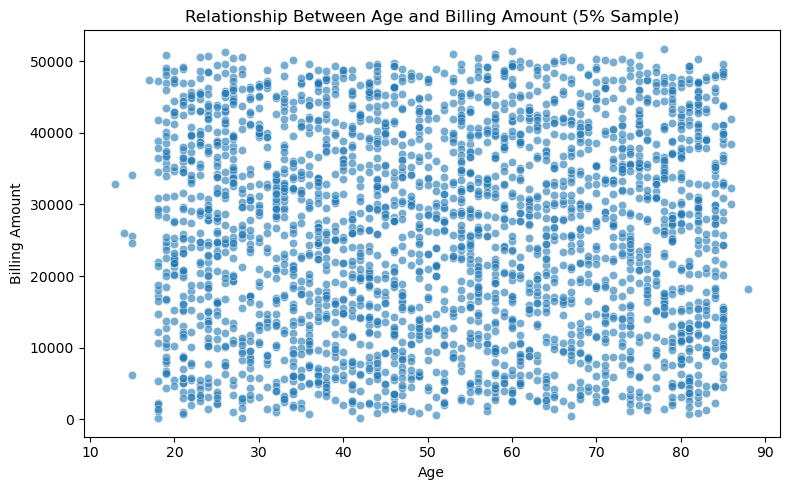

In [195]:
sample_df = df.sample(frac=0.05, random_state=42)

plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, x="Age", y="Billing Amount", alpha=0.6)
plt.title("Relationship Between Age and Billing Amount (5% Sample)")
plt.xlabel("Age")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()

There is no clear relationship between age and billing amount, indiciating that patient age does not strongly influence hopsital charges. 

### Figure #5 - Pie Chart of Admission Type

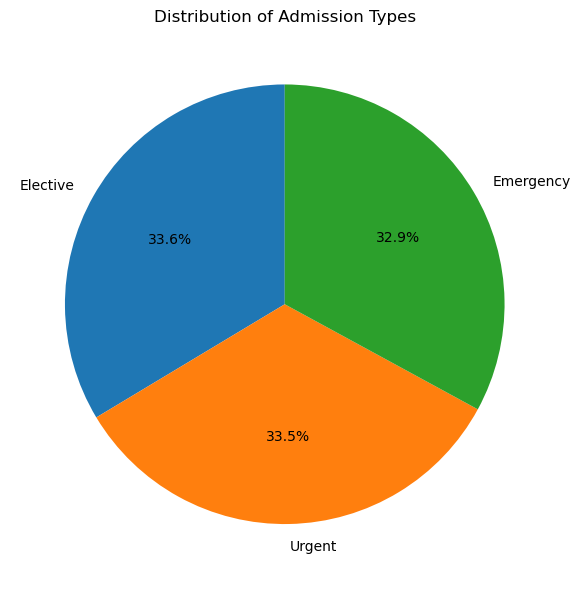

In [196]:
admission_counts = df["Admission Type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    admission_counts.values,
    labels=admission_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Admission Types")
plt.tight_layout()
plt.show()

The distribution of admission types shows how patients are split among emergency, urgent, and elective admissions.